<a href="https://colab.research.google.com/github/bintangkw/pmobile/blob/master/Tubes3_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Library

In [223]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##2. Preprocessing

In [224]:
df = pd.read_excel('/content/drive/MyDrive/ANALITIK DATA 2/Modul 6/MODUL 6 - REGRESI LOGISTIK_BELI MOBIL (1).xlsx')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


##3. Data Understanding

In [225]:
df.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,38.872000,1.472000,0.464000,0.780000,221.872000,0.456000
std,72.312977,13.787239,0.892413,0.499703,0.746881,80.168144,0.499059
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,63.250000,30.000000,1.000000,0.000000,0.000000,170.500000,0.000000
50%,125.500000,36.500000,2.000000,0.000000,1.000000,200.000000,0.000000
75%,187.750000,45.000000,2.000000,1.000000,1.000000,257.750000,1.000000
max,250.000000,164.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [226]:
df['Kelamin'].value_counts()

,count
Kelamin,
0,134
1,116


##4. Cleaning Data

In [227]:
df = df.drop(columns=['ID'])

In [228]:
df.isnull().sum()

,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [229]:
df.dropna()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,240,1
1,49,2,1,1,100,0
2,52,1,0,2,250,1
3,26,2,1,1,130,0
4,45,3,0,2,237,1
...,...,...,...,...,...,...
245,34,0,1,1,200,1
246,40,1,1,1,200,0
247,45,1,0,1,300,1
248,56,2,0,1,400,1


##5. Eksplorasi Data Analysis (EDA)

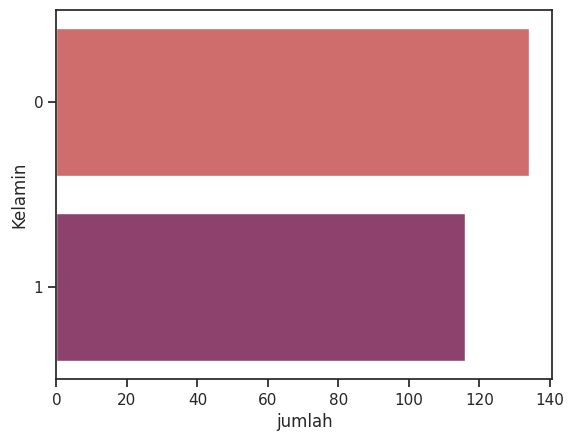

In [230]:
import warnings #menambahkan library warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='ticks') #mengatur tema visualisasi
sns.countplot(y='Kelamin', data=df, palette='flare')
plt.xlabel('jumlah')
plt.show()

In [231]:
# Import LabelEncoder
from sklearn import preprocessing  # Mengimpor LabelEncoder dari pustaka sklearn untuk mengubah label kategorikal menjadi angka.

# Creating labelEncoder
le = preprocessing.LabelEncoder()  # Membuat objek label encoder untuk melakukan konversi label ke format numerik.

# Converting string labels into numbers.
df['Beli_Mobil'] = le.fit_transform(df['Beli_Mobil'])
df['Penghasilan'] = le.fit_transform(df['Penghasilan'])
df.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,73,1
1,49,2,1,1,2,0
2,52,1,0,2,75,1
3,26,2,1,1,10,0
4,45,3,0,2,70,1


In [232]:

original_departments = le.classes_

# Membuat dictionary (kamus) untuk memetakan label angka ke nama departemen
mapping = dict(zip(le.transform(original_departments), original_departments))

# Mengurutkan mapping berdasarkan label angka (dari kecil ke besar)
sorted_mapping = dict(sorted(mapping.items()))

# Menampilkan hasil mapping label angka ke nama departemen
print("\nMapping dari label numerik ke nama departemen (yang sudah diurutkan):")
for key, value in sorted_mapping.items():
    print(f"{key}: {value}")


Mapping dari label numerik ke nama departemen (yang sudah diurutkan):
0: 95
1: 98
2: 100
3: 102
4: 103
5: 120
6: 122
7: 125
8: 128
9: 129
10: 130
11: 132
12: 133
13: 135
14: 136
15: 137
16: 139
17: 140
18: 141
19: 143
20: 146
21: 147
22: 150
23: 155
24: 158
25: 159
26: 160
27: 161
28: 162
29: 163
30: 165
31: 166
32: 168
33: 169
34: 170
35: 172
36: 173
37: 174
38: 175
39: 177
40: 178
41: 179
42: 180
43: 181
44: 186
45: 187
46: 190
47: 193
48: 194
49: 195
50: 196
51: 198
52: 199
53: 200
54: 202
55: 203
56: 204
57: 206
58: 207
59: 215
60: 216
61: 220
62: 222
63: 223
64: 224
65: 225
66: 230
67: 233
68: 235
69: 236
70: 237
71: 238
72: 239
73: 240
74: 248
75: 250
76: 251
77: 260
78: 261
79: 266
80: 270
81: 277
82: 280
83: 288
84: 289
85: 290
86: 297
87: 300
88: 301
89: 305
90: 320
91: 322
92: 324
93: 339
94: 340
95: 350
96: 377
97: 390
98: 400
99: 420
100: 431
101: 450
102: 460
103: 490


In [233]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
df

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,73,1
1,49,2,1,1,2,0
2,52,1,0,2,75,1
3,26,2,1,1,10,0
4,45,3,0,2,70,1
...,...,...,...,...,...,...
245,34,0,1,1,53,1
246,40,1,1,1,53,0
247,45,1,0,1,87,1
248,56,2,0,1,98,1


In [234]:
import sklearn.model_selection as ms
x = df[['Usia','Status','Memiliki_Mobil','Penghasilan','Beli_Mobil']]
y = df['Kelamin']
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=30)

In [235]:
print("Feature matrix:", X_train.shape)
print("Target matrix:", X_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (175, 5)
Target matrix: (75, 5)
Feature matrix: (175,)
Target matrix: (75,)


##7. Modeling (Decision tree)

In [236]:
!pip install tensorflow

# Mengimpor modul Keras dari TensorFlow, digunakan untuk membangun model jaringan saraf tiruan (Artificial Neural Network)
from tensorflow import keras
from tensorflow.keras.models import Sequential

# Mengimpor jenis-jenis lapisan (layer) yang akan digunakan dalam model:
from tensorflow.keras.layers import Flatten, Dense

In [237]:
model = Sequential([
    # dense layer 1
    Dense(256, input_dim=5, activation='sigmoid'),  #265 = hiden layer 1, input_dim=9 = jumlah fitur yang digunakan

    # dense layer 2
    Dense(128, activation='sigmoid'),

    # output layer
    Dense(2, activation='softmax')
    ])

In [238]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [239]:
history = model.fit(X_train, y_train,
          epochs=50, #Jumlah pelatihan ulang seluruh data
          batch_size=64, #Jumlah data per batch saat pelatihan
          validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.5247 - loss: 0.7492 - val_accuracy: 0.5429 - val_loss: 0.7289
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5641 - loss: 0.7230 - val_accuracy: 0.5429 - val_loss: 0.7075
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5253 - loss: 0.6916 - val_accuracy: 0.6286 - val_loss: 0.6723
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6704 - loss: 0.6384 - val_accuracy: 0.6286 - val_loss: 0.7115
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6174 - loss: 0.6648 - val_accuracy: 0.6286 - val_loss: 0.6915
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6622 - loss: 0.6404 - val_accuracy: 0.5714 - val_loss: 0.6662
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6606 - loss: 0.6241 - val_accuracy: 0.5429 - val_loss: 0.6719
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.6717 - loss: 0.6353 - val_accuracy: 0.5429 - val_loss: 0

In [240]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'model' is your compiled Keras model
# Train the model and store the history



# Epoch range
epochs = list(range(1, len(history.history['accuracy']) + 1))

# Subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=["Akurasi", "Loss"])

# Akurasi
fig.add_trace(go.Scatter(y=history.history['accuracy'], x=epochs, name='Train', line_color='blue'), row=1, col=1)
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], x=epochs, name='Val', line_color='orange'), row=1, col=1)

# Loss
fig.add_trace(go.Scatter(y=history.history['loss'], x=epochs, name='Train', line_color='green'), row=1, col=2)
fig.add_trace(go.Scatter(y=history.history['val_loss'], x=epochs, name='Val', line_color='red'), row=1, col=2)

# Layout
fig.update_layout(title="Performa Model per Epoch", width=900, height=400)
fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Akurasi", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()

In [241]:
# Mengevaluasi performa model pada data uji
results = model.evaluate(X_test, y_test, verbose=0)  # Evaluasi tanpa menampilkan log

print('test loss, test acc:', results)  # Menampilkan nilai loss dan akurasi

test loss, test acc: [0.6058512926101685, 0.6800000071525574]


In [242]:
df

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,73,1
1,49,2,1,1,2,0
2,52,1,0,2,75,1
3,26,2,1,1,10,0
4,45,3,0,2,70,1
...,...,...,...,...,...,...
245,34,0,1,1,53,1
246,40,1,1,1,53,0
247,45,1,0,1,87,1
248,56,2,0,1,98,1


In [243]:
# Contoh prediksi dengan data baru
new_data = pd.DataFrame({
    'Usia': [20],
    'Status': [1],
    'Memiliki_Mobil': [0],
    'Penghasilan': [220],
    'Beli_Mobil' : [0]
})

# Melakukan prediksi
predictions = model.predict(new_data)

# Menampilkan hasil prediksi (probabilitas tiap kelas)
print("Probabilitas untuk setiap kelas:", predictions)

# Menentukan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions)
print("Kelas yang diprediksi:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Probabilitas untuk setiap kelas: [[0.7502441  0.24975593]]
Kelas yang diprediksi: 0


In [256]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
print("ANN:")
print(classification_report(y_test, y_pred_ann))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_ann))

ANN:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.72      0.70      0.71        37

    accuracy                           0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.72      0.72      0.72        75

AUC-ROC: 0.7496443812233287
